# Análisis Exploratorio de Datos - CineVision Studios

In [35]:

# =========================================
# CARGA DE LIBRERÍAS Y DATOS
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest

# Cargar el archivo CSV
df = pd.read_csv("movies.csv", encoding="latin1")

# Asegurar que releaseDate sea de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")

# Extraer el año de lanzamiento en una nueva columna
df["releaseYear"] = df["releaseDate"].dt.year

# Vista rápida de los datos
df.head(3)

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,1995-12-09,5.7,2077,2,2,1,25,15,9,1995
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,1993-10-15,6.5,223,3,3,2,15,3,9,1993
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,1977-05-25,8.2,16598,3,2,1,105,5,62,1977


## Ejercicio 1: Exploración rápida del conjunto de datos
Se pide un resumen del dataset:  
- Conteo de filas y columnas.  
- Tipos de cada columna.  
- Descripción estadística.  
- Valores nulos o duplicados.  

In [33]:
# Dimensiones del DataFrame
print("Dimensiones del DataFrame (filas, columnas):", df.shape)

# Información de columnas y tipos de datos
df.info()

# Valores nulos en cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Duplicados
duplicados = df.duplicated().sum()
print(f"\nHay {duplicados} filas duplicadas en el DataFrame.")

# Resumen estadístico de variables numéricas
df.describe(include=[np.number])

Dimensiones del DataFrame (filas, columnas): (10000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         10000 non-null  int64         
 1   budget                     10000 non-null  int64         
 2   genres                     9947 non-null   object        
 3   homePage                   4193 non-null   object        
 4   productionCompany          9543 non-null   object        
 5   productionCompanyCountry   8720 non-null   object        
 6   productionCountry          9767 non-null   object        
 7   revenue                    10000 non-null  float64       
 8   runtime                    10000 non-null  int64         
 9   video                      9514 non-null   object        
 10  director                   9926 non-null   object        
 11  actors     

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,releaseYear,releaseMonth
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,2008.494100,6.917300
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,13.703581,3.392759
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,1902.000000,1.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,2004.000000,4.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,2013.000000,7.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,2018.000000,10.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,2022.000000,12.000000


## Ejercicio 2: Tipo de cada variable

En esta sección, clasificamos las columnas en:
- **Cualitativa nominal** (categorías sin orden)
- **Cualitativa ordinal** (categorías con un orden específico)
- **Cuantitativa continua** (valores numéricos en un rango continuo)
- **Cuantitativa discreta** (valores numéricos enteros, contables)

## Clasificación Completa de Variables

A continuación se presenta la clasificación de cada variable del dataset en **cualitativa nominal**, **cualitativa ordinal**, **cuantitativa continua** o **cuantitativa discreta**.

---

1. **Id**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** Aunque sea un número, funciona como identificador. No existe relación aritmética ni ordenable con otras películas.

2. **popularity**  
   - **Tipo:** Cuantitativa continua  
   - **Justificación:** Es un índice que puede tomar valores decimales, resultado de la actividad de la película en plataformas (búsquedas, visualizaciones, etc.).

3. **budget**  
   - **Tipo:** Cuantitativa continua  
   - **Justificación:** Presupuesto de la película (valor monetario), que puede ser cualquier número real dentro de un rango.

4. **revenue**  
   - **Tipo:** Cuantitativa continua  
   - **Justificación:** Ingresos obtenidos por la película (valor monetario), también pueden ser números reales grandes.

5. **original_title**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** Título original de la película en texto, sin relación numérica ni orden.

6. **originalLanguage**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** Idioma de la película (ej. "en", "es", "fr"), son categorías sin orden específico.

7. **title**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** Título traducido al inglés u otro idioma; también es texto sin orden.

8. **homePage**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** URL de la página oficial de la película, cada valor es un string (existe o no, cada una es diferente).

9. **video**  
   - **Tipo:** Cualitativa nominal  
   - **Justificación:** Variable booleana (True/False) que indica si la película tiene video promocional.

10. **director**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** Nombre(s) de la(s) persona(s) que dirigen la película; se maneja como categoría sin un orden intrínseco.

11. **runtime**  
    - **Tipo:** Cuantitativa continua  
    - **Justificación:** Duración de la película (minutos). Aunque a menudo se presente en enteros, conceptualmente puede ser un valor continuo.

12. **genres**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** Lista o categorías de género (comedia, drama, acción, etc.). Son etiquetas sin orden específico.

13. **genresAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Cantidad de géneros asociados a la película (1, 2, 3...). Es un conteo entero.

14. **productionCompany**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** Nombre(s) de la(s) compañía(s) productora(s); se trata como texto o etiquetas categóricas.

15. **productionCoAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Número de compañías productoras. Es un conteo (valor entero).

16. **productionCompanyCountry**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** País o países de las compañías productoras. Son categorías textuales sin orden.

17. **productionCountry**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** País o países en los que se rodó la película; se maneja como categorías.

18. **productionCountriesAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Cantidad de países involucrados en la producción. Es un conteo entero.

19. **releaseDate**  
    - **Tipo:** Cualitativa ordinal (o dato tipo fecha)  
    - **Justificación:** La fecha de lanzamiento puede considerarse ordinal en el tiempo (existe un orden cronológico), o como un tipo fecha que a menudo se analiza aparte.

20. **voteCount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Número total de votos (conteo entero).

21. **voteAvg**  
    - **Tipo:** Cuantitativa continua  
    - **Justificación:** Promedio aritmético de los votos, con valores decimales (por ejemplo, entre 0 y 10).

22. **actors**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** Lista de nombres o IDs de actores, se manejan como categorías textuales.

23. **actorsPopularity**  
    - **Tipo:** Cuantitativa continua  
    - **Justificación:** Índice de popularidad del elenco, puede tomar valores decimales.

24. **actorsCharacter**  
    - **Tipo:** Cualitativa nominal  
    - **Justificación:** Nombre del personaje interpretado; es texto sin un orden inherente.

25. **actorsAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Cantidad total de actores/actrices en el elenco. Es un conteo entero.

26. **castWomenAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Número de actrices (mujeres) en la película; conteo entero.

27. **castMenAmount**  
    - **Tipo:** Cuantitativa discreta  
    - **Justificación:** Número de actores (hombres) en la película; conteo entero.

---

### Resumen de la Clasificación

- **Cualitativas nominales:**  
  *Id, original_title, originalLanguage, title, homePage, video, director, genres, productionCompany, productionCompanyCountry, productionCountry, actors, actorsCharacter*

- **Cualitativa ordinal (fecha):**  
  *releaseDate*

- **Cuantitativas continuas:**  
  *popularity, budget, revenue, runtime, voteAvg, actorsPopularity*

- **Cuantitativas discretas:**  
  *genresAmount, productionCoAmount, productionCountriesAmount, voteCount, actorsAmount, castWomenAmount, castMenAmount*

## Ejercicio 3: Distribución normal y tablas de frecuencia

El objetivo es:

1. Verificar la forma de las distribuciones para las variables cuantitativas, usando histogramas y (opcional) pruebas de normalidad.
2. Generar tablas de frecuencia para las variables cualitativas, incluyendo barplots.
3. Explicar e interpretar todos los resultados.

### Clasificación de las Variables

Basándonos en la descripción, aquí recordamos cómo están clasificadas las variables de nuestro CSV:

- **Cualitativas nominales**  
  (1) Id, (2) original_title, (3) originalLanguage, (4) title, (5) homePage,  
  (6) video, (7) director, (8) genres, (9) productionCompany,  
  (10) productionCompanyCountry, (11) productionCountry,  
  (12) actors, (13) actorsCharacter  

- **Cualitativa ordinal (fecha)**  
  (14) releaseDate  

- **Cuantitativas continuas**  
  (1) popularity, (2) budget, (3) revenue, (4) runtime,  
  (5) voteAvg, (6) actorsPopularity  

- **Cuantitativas discretas**  
  (1) genresAmount, (2) productionCoAmount, (3) productionCountriesAmount,  
  (4) voteCount, (5) actorsAmount, (6) castWomenAmount, (7) castMenAmount

## 3.1. Distribución de las Variables Cuantitativas

A continuación se generan histogramas (con densidad KDE) para observar la forma de la distribución de cada variable cuantitativa. Además, opcionalmente realizamos pruebas de normalidad (Shapiro-Wilk o Kolmogorov-Smirnov) en caso de que sean viables.

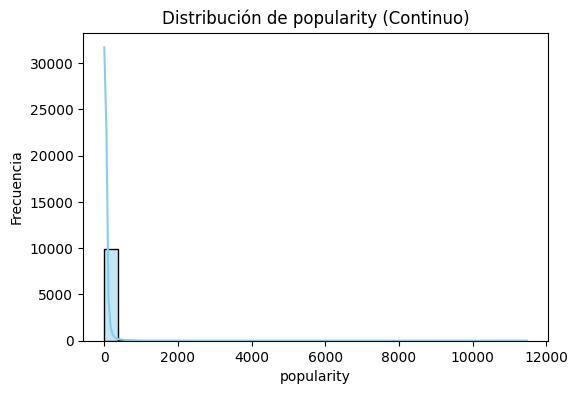

Kolmogorov-Smirnov test para popularity: p-value = 0.00000
 -> Rechazamos hipótesis de normalidad (α=0.05)



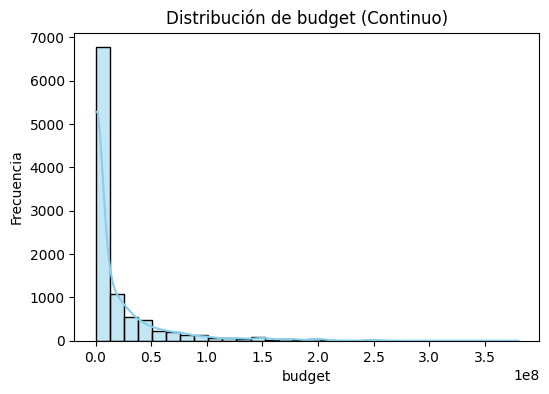

Kolmogorov-Smirnov test para budget: p-value = 0.00000
 -> Rechazamos hipótesis de normalidad (α=0.05)



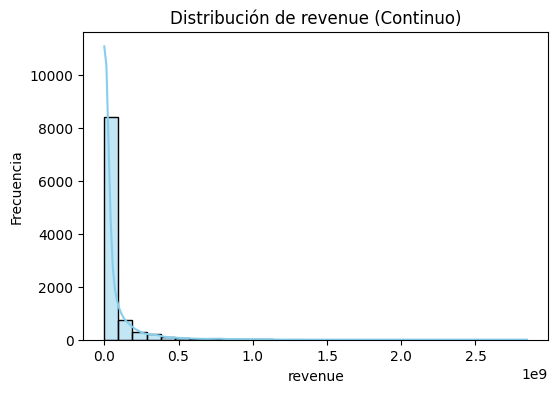

Kolmogorov-Smirnov test para revenue: p-value = 0.00000
 -> Rechazamos hipótesis de normalidad (α=0.05)



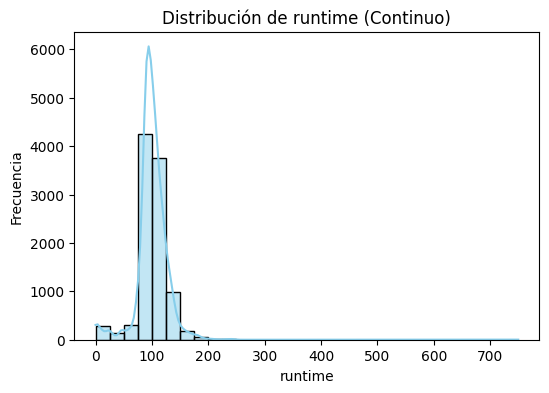

Kolmogorov-Smirnov test para runtime: p-value = 0.00000
 -> Rechazamos hipótesis de normalidad (α=0.05)



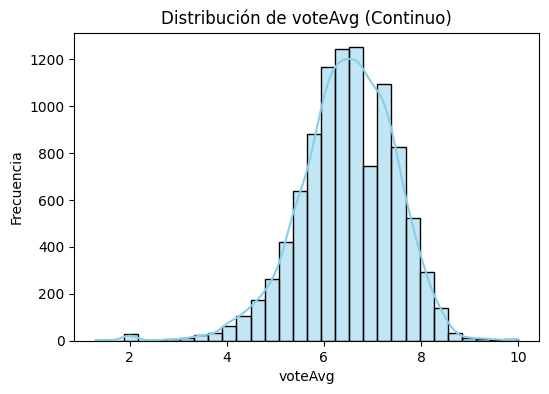

Kolmogorov-Smirnov test para voteAvg: p-value = 0.00000
 -> Rechazamos hipótesis de normalidad (α=0.05)

La columna 'actorsPopularity' no es numérica. Se omite la prueba de normalidad.


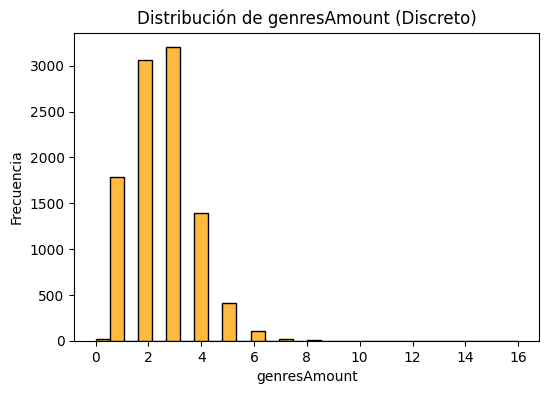

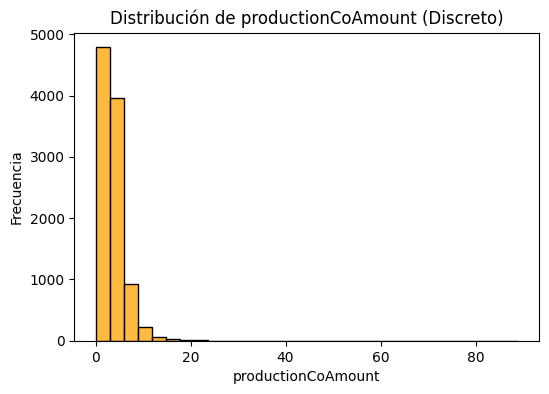

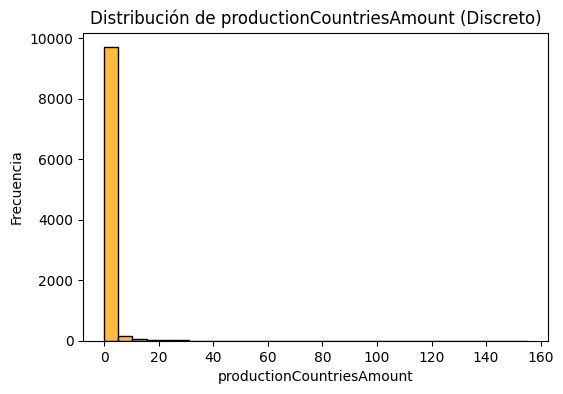

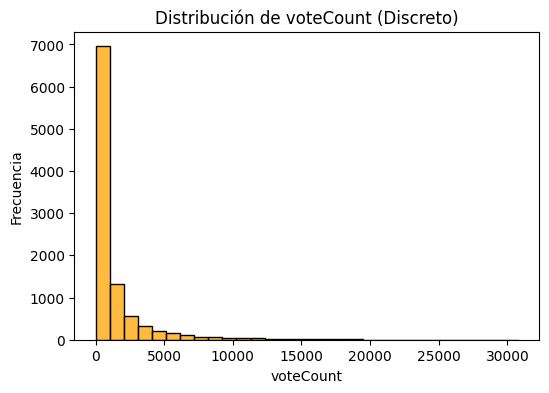

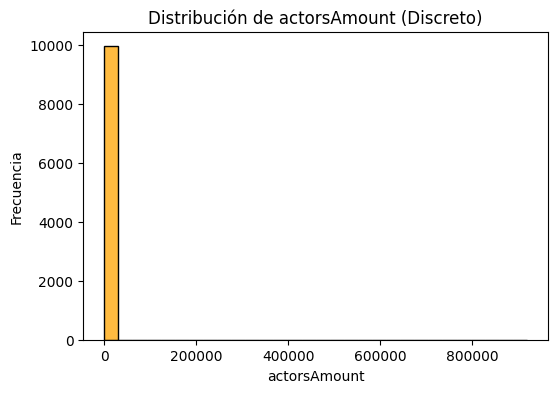

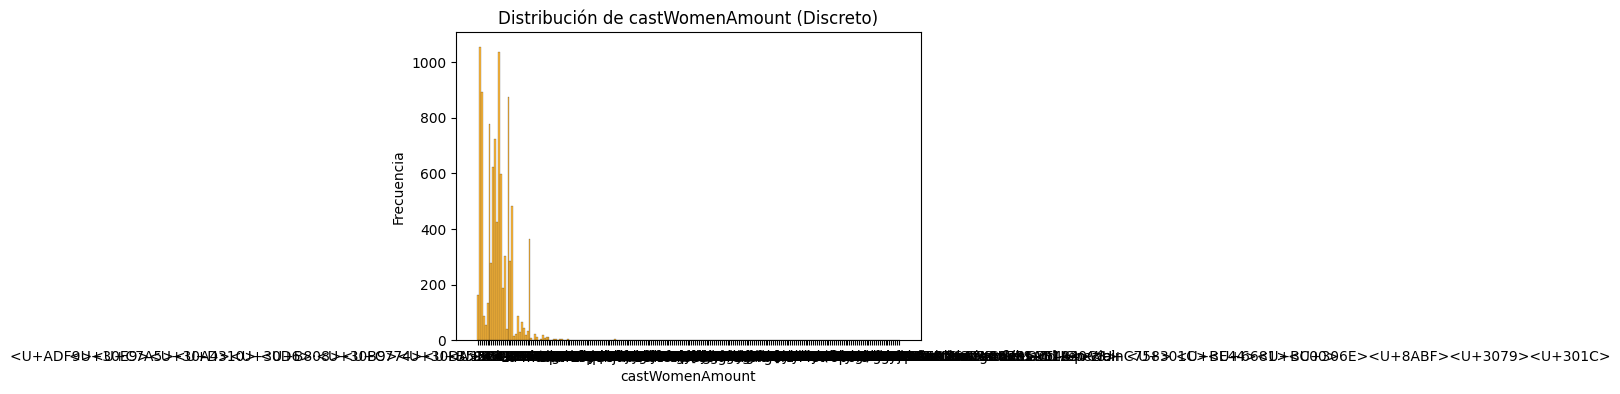

/Users/hansellopez/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hansellopez/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hansellopez/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


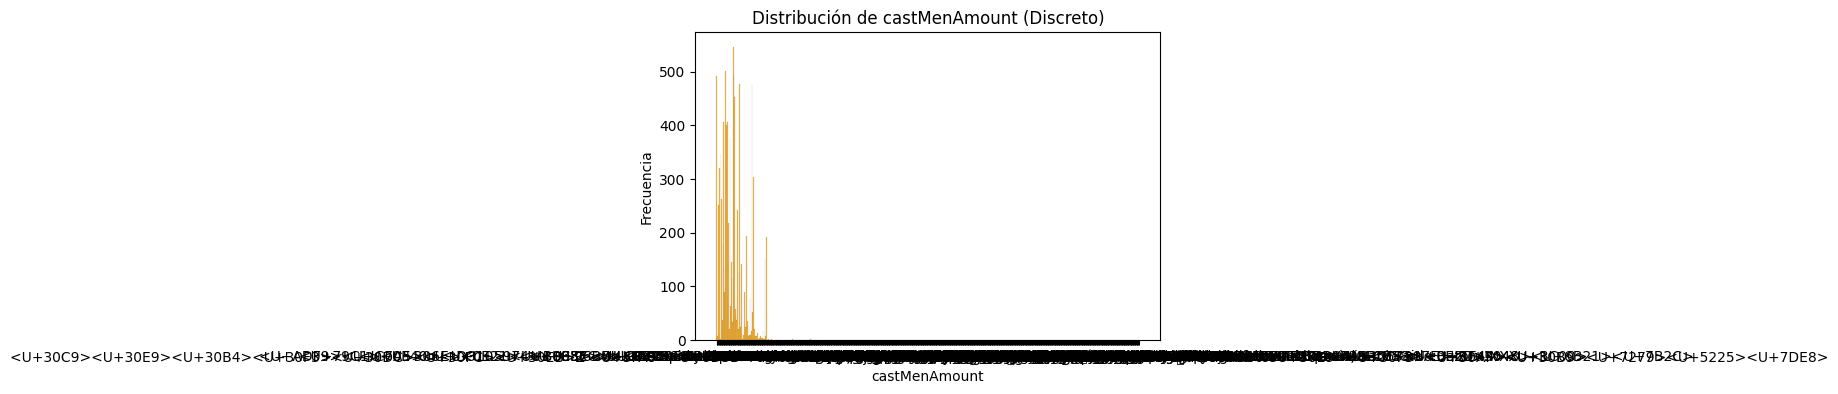

In [37]:
# Variables cuantitativas continuas
continuous_vars = ["popularity", "budget", "revenue", "runtime", "voteAvg", "actorsPopularity"]

# Variables cuantitativas discretas
discrete_vars = ["genresAmount", "productionCoAmount", "productionCountriesAmount",
                 "voteCount", "actorsAmount", "castWomenAmount", "castMenAmount"]

# ----------------
# HISTOGRAMAS + KDE PARA CADA VARIABLE CUANTITATIVA CONTINUA
# ----------------
for var in continuous_vars:
    # Verificamos que la columna exista
    if var not in df.columns:
        continue
    
    # Comprobar si la columna es numérica
    if not pd.api.types.is_numeric_dtype(df[var]):
        print(f"La columna '{var}' no es numérica. Se omite la prueba de normalidad.")
        continue

    data_for_test = df[var].dropna()

    # Hacer el histograma
    plt.figure(figsize=(6,4))
    sns.histplot(data_for_test, kde=True, color="skyblue", bins=30)
    plt.title(f"Distribución de {var} (Continuo)")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

    # Prueba de Shapiro o K-S
    if len(data_for_test) < 5000:
        stat, pvalue = shapiro(data_for_test)
        print(f"Shapiro-Wilk test para {var}: p-value = {pvalue:.5f}")
    else:
        stat, pvalue = kstest(
            (data_for_test - data_for_test.mean()) / data_for_test.std(), 'norm'
        )
        print(f"Kolmogorov-Smirnov test para {var}: p-value = {pvalue:.5f}")

    if pvalue < 0.05:
        print(" -> Rechazamos hipótesis de normalidad (α=0.05)\n")
    else:
        print(" -> No se rechaza hipótesis de normalidad (α=0.05)\n")

# ----------------
# HISTOGRAMAS PARA VARIABLES CUANTITATIVAS DISCRETAS
# ----------------
for var in discrete_vars:
    if var in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[var].dropna(), kde=False, color="orange", bins=30)
        plt.title(f"Distribución de {var} (Discreto)")
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.show()
        
        # Se podría hacer pruebas de normalidad, pero al ser discreto (conteos),
        # no siempre es tan relevante verificar normalidad.

## 3.2. Tabla de Frecuencia de Variables Cualitativas

Listamos algunas variables cualitativas nominales y creamos una tabla con la frecuencia de sus categorías. También podemos hacer un gráfico de barras para visualizar.


=== Frecuencia para originalLanguage ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
originalLanguage,,
en,7772,77.72
ja,644,6.44
es,425,4.25
fr,271,2.71
ko,167,1.67
zh,119,1.19
it,100,1.00
de,84,0.84
cn,80,0.80


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")


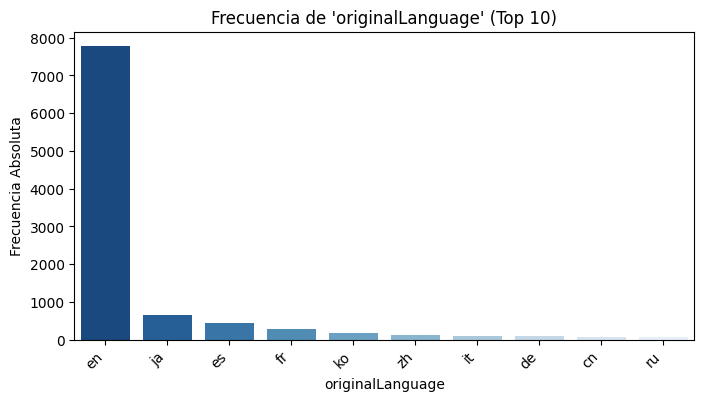


=== Frecuencia para video ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
video,,
False,9430,94.30
NaN,486,4.86
True,84,0.84


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette="Blues_r")


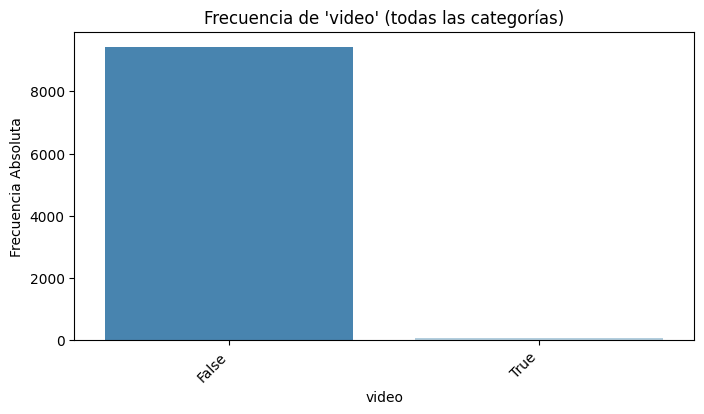


=== Frecuencia para director ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
director,,
NaN,74,0.74
Steven Spielberg,29,0.29
Clint Eastwood,28,0.28
Ridley Scott,23,0.23
Steven Soderbergh,19,0.19
Kunihiko Yuyama,19,0.19
Martin Scorsese,19,0.19
Ron Howard,18,0.18
Robert Zemeckis,18,0.18


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")


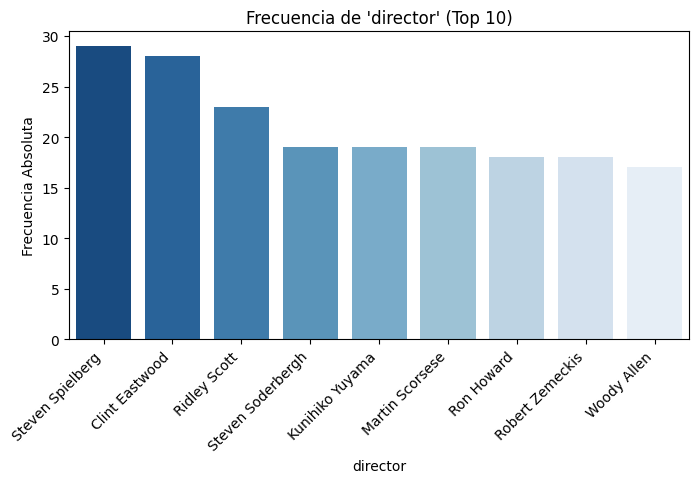


=== Frecuencia para genres ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
genres,,
Drama,521,5.21
Comedy,440,4.40
Horror,230,2.30
Drama|Romance,211,2.11
Horror|Thriller,205,2.05
Comedy|Romance,201,2.01
Documentary,194,1.94
Comedy|Drama,140,1.40
Action|Thriller,121,1.21


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")


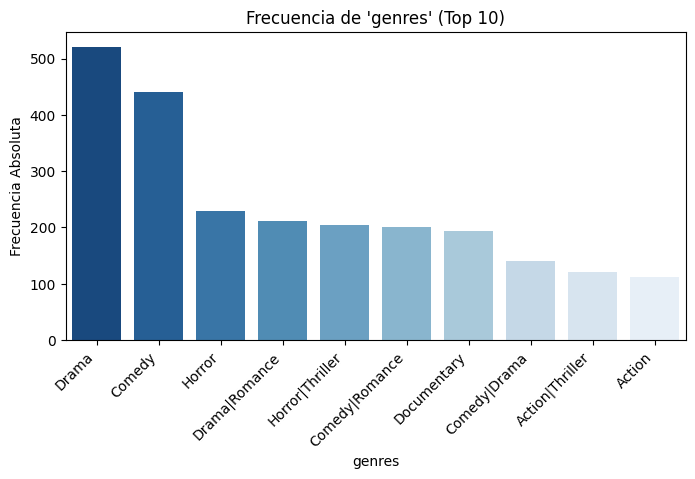


=== Frecuencia para productionCompany ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
productionCompany,,
NaN,457,4.57
Paramount,55,0.55
Universal Pictures,50,0.50
Warner Bros. Pictures,37,0.37
Toei Animation,34,0.34
DreamWorks Animation,33,0.33
Columbia Pictures,32,0.32
The Asylum,31,0.31
Walt Disney Pictures,31,0.31


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")


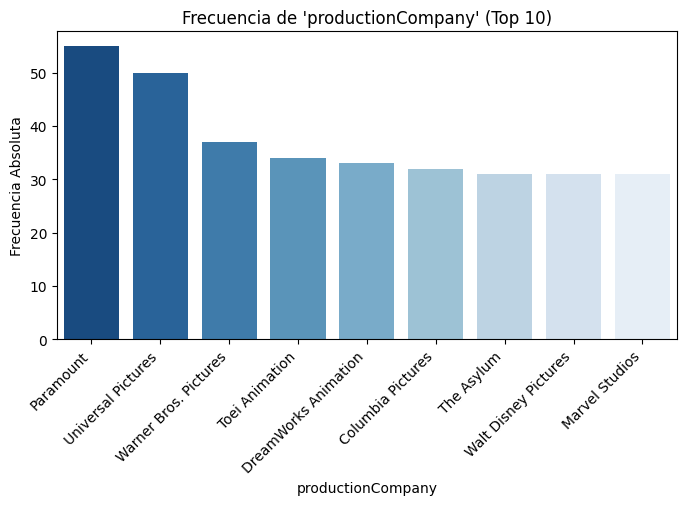


=== Frecuencia para productionCountry ===
Top 10 categorías (Frecuencia absoluta y %):



,Frecuencia Absoluta,Frecuencia Relativa (%)
productionCountry,,
United States of America,4971,49.71
Japan,613,6.13
United Kingdom|United States of America,339,3.39
United Kingdom,294,2.94
NaN,233,2.33
Canada|United States of America,223,2.23
France,164,1.64
Canada,157,1.57
South Korea,152,1.52


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/914332314.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")


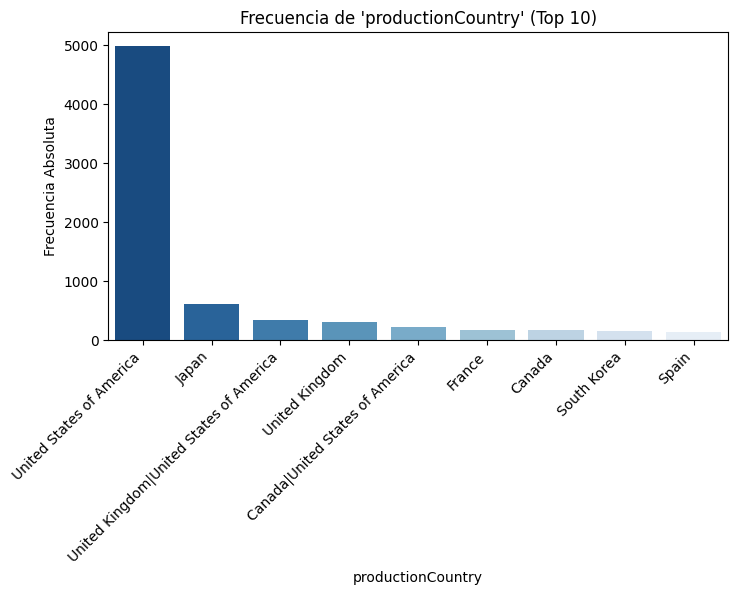

In [39]:
categorical_vars = [
    "originalLanguage", 
    "video", 
    "director", 
    "genres", 
    "productionCompany", 
    "productionCountry"
]

# Recorremos cada variable categórica
for col in categorical_vars:
    if col in df.columns:
        print(f"\n=== Frecuencia para {col} ===")
        
        # 1. Frecuencia absoluta
        freq_abs = df[col].value_counts(dropna=False)
        
        # 2. Frecuencia relativa (proporción)
        freq_rel = df[col].value_counts(dropna=False, normalize=True) * 100  # En %
        
        # Mostramos la tabla completa o solo top 10 (depende de la cantidad de categorías)
        # Aquí, para no saturar, mostramos top 10
        print("Top 10 categorías (Frecuencia absoluta y %):\n")
        top_10_abs = freq_abs.head(10)
        top_10_rel = freq_rel.head(10)
        
        tabla_top10 = pd.DataFrame({
            "Frecuencia Absoluta": top_10_abs,
            "Frecuencia Relativa (%)": top_10_rel
        })
        
        display(tabla_top10)
        
        # 3. Gráfico de barras
        # Si la variable tiene muchas categorías, mostrar un barplot con top 10
        # Si tiene pocas, podemos mostrarlas todas.
        num_cats = len(freq_abs)
        
        # Definimos un umbral arbitrario para graficar
        if num_cats <= 20:
            # Graficar todas las categorías
            plt.figure(figsize=(8,4))
            sns.barplot(x=freq_abs.index, y=freq_abs.values, palette="Blues_r")
            plt.xticks(rotation=45, ha="right")
            plt.title(f"Frecuencia de '{col}' (todas las categorías)")
            plt.ylabel("Frecuencia Absoluta")
            plt.show()
        else:
            # Graficar sólo top 10
            plt.figure(figsize=(8,4))
            sns.barplot(x=top_10_abs.index, y=top_10_abs.values, palette="Blues_r")
            plt.xticks(rotation=45, ha="right")
            plt.title(f"Frecuencia de '{col}' (Top 10)")
            plt.ylabel("Frecuencia Absoluta")
            plt.show()

## a) ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [19]:
# Ordenar el DataFrame por presupuesto (budget) en orden descendente
df_sorted = df.sort_values(by="budget", ascending=False)

print("10 Películas con mayor presupuesto:")
df_sorted[["title", "budget"]].head(10)  # Mostramos el DataFrame al final de la celda

10 Películas con mayor presupuesto:


,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
4953,Justice League,300000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
607,Superman Returns,270000000
7134,The Lion King,260000000
3791,Tangled,260000000
280,Spider-Man 3,258000000


## b) ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [20]:
# Ordenar por revenue descendente
highest_revenue = df.sort_values(by="revenue", ascending=False)

print("10 Películas con más ingresos:")
highest_revenue[["title", "revenue"]].head(10)

10 Películas con más ingresos:


,title,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


## c) ¿Cuál es la película que más votos tuvo?

In [21]:
# Película con más votos
df_votes = df.loc[df["voteCount"].idxmax()]

print("Película con más votos:")
df_votes[["title", "voteCount"]]

Película con más votos:


title        Inception
voteCount        30788
Name: 3511, dtype: object

## d) ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
(Suponemos que "peor" = menor `voteAvg`)

In [40]:
worst_movie = df.loc[df["voteAvg"].idxmin()]
worst_movie[["title", "voteAvg"]]

title      DAKAICHI -I'm Being Harassed by the Sexiest Ma...
voteAvg                                                  1.3
Name: 9786, dtype: object

## e) ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?
### (Incluye el gráfico de barras)

Cantidad de peliculas cada año releaseYear
1902      1
1920      1
1921      1
1922      1
1925      2
       ... 
2018    629
2019    612
2020    533
2021    816
2022      7
Name: count, Length: 99, dtype: int64

El año con más películas fue 2021 con 816 películas.


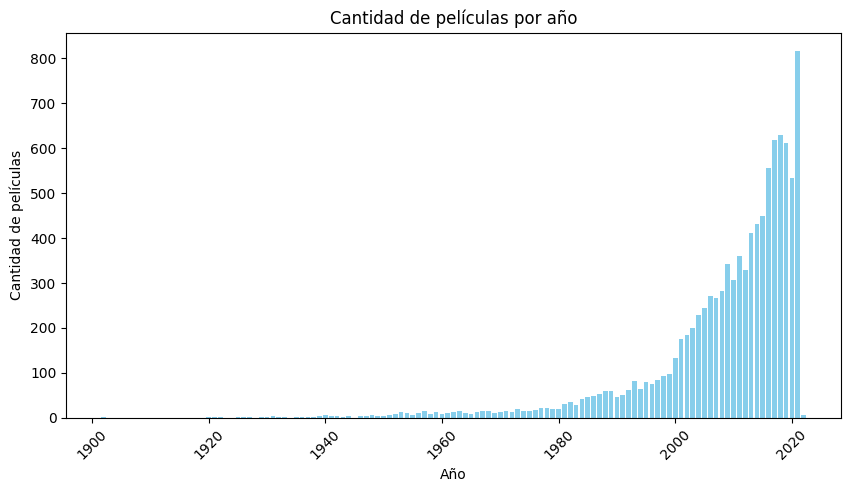

In [23]:
# Contar películas por año
df_date = df["releaseYear"].value_counts().sort_index()

# Asegurar que releaseDate es de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
# Extraer el año
df["releaseYear"] = df["releaseDate"].dt.year 

print("Cantidad de peliculas cada año", df_date)

# Identificar el año con más películas
movies_year = df_date.idxmax()
movies_count = df_date.max()
print(f"\nEl año con más películas fue {movies_year} con {movies_count} películas.")

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df_date.index, df_date.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por año')
plt.xticks(rotation=45)
plt.show()

## f) Género principal de las 20 películas más recientes

In [24]:
# Ordenar por fecha de lanzamiento (más reciente a más antigua) y tomar 20
df_recent = df.sort_values(by="releaseDate", ascending=False).head(20)

# Extraer el primer género
df_recent["main_genre"] = df_recent["genres"].astype(str).str.split("|").str[0]

print("Género principal de las 20 películas más recientes:")
df_recent[["title", "releaseDate", "main_genre"]]

Género principal de las 20 películas más recientes:


,title,releaseDate,main_genre
9516,A Shot Through the Wall,2022-01-21,Drama
9545,Presque,2022-01-19,Comedy
9197,Italian Studies,2022-01-14,Drama
9808,See for Me,2022-01-07,Thriller
9586,American Siege,2022-01-07,Action
9982,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,Documentary
9951,WWE Day 1 2022,2022-01-01,Action
9257,Return of Chucky,2021-12-31,nan
9241,"Karem, La Posesión",2021-12-31,nan
9866,Gabriel's Rapture: Part One,2021-12-31,Romance


### ¿Cuál es el género principal que predomina en el conjunto de datos?

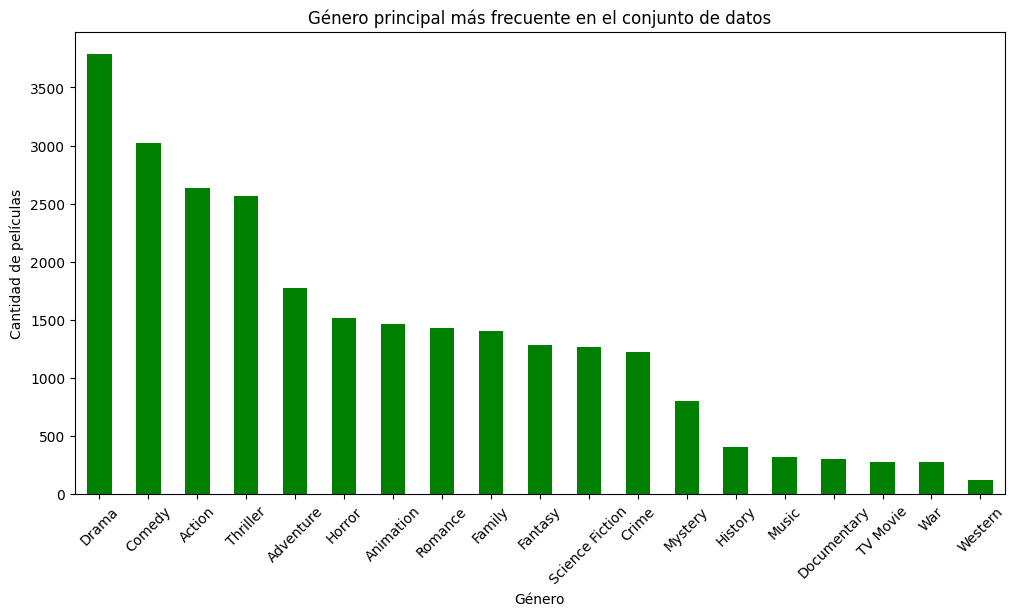

El género principal más común en el conjunto de datos es: Drama


In [25]:
# Dividir la columna "genres" en listas y contar frecuencia
df_principal_genre = df["genres"].dropna().str.split("|").explode()
genre_counts = df_principal_genre.value_counts()

genre_counts.head(10)  # Ver las 10 categorías más frecuentes

# Graficar la frecuencia de cada género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar", color="green")
plt.title("Género principal más frecuente en el conjunto de datos")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)
plt.show()

# Género más común
common_genre = genre_counts.idxmax()
print(f"El género principal más común en el conjunto de datos es: {common_genre}")

### ¿A qué género principal pertenecen las películas más largas?

In [26]:
# Ordenar por duración (runtime) y tomar algunas de las más largas
df_largo = df.sort_values(by="runtime", ascending=False).head(10)

# Extraer el primer género
df_largo["main_genre"] = df_largo["genres"].astype(str).str.split("|").str[0]

print("Películas más largas (top 10) con su género principal:")
df_largo[["title", "runtime", "main_genre"]]

Películas más largas (top 10) con su género principal:


,title,runtime,main_genre
9347,How Ponyo was Born ~Hayao Miyazaki's Thought P...,750,Documentary
5358,Crystal Lake Memories: The Complete History of...,400,Documentary
3885,Napoleon,333,Drama
962,1900,317,Drama
1263,Cleopatra,248,Drama
7065,Kill Bill: The Whole Bloody Affair,247,Action
9686,Zack Snyder's Justice League,242,Action
1948,Hamlet,242,Drama
6159,WWE Wrestlemania 31,240,Action
5592,WWE WrestleMania XXX,240,Action


## g) ¿Las películas de qué género principal obtuvieron mayores ganancias?

In [27]:
# Asegurar que 'revenue' sea numérico
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce").fillna(0)

# Extraer el primer género de cada película
df["main_genre"] = df["genres"].astype(str).str.split("|").str[0]

# Agrupar por género principal y sumar las ganancias
genre_revenue = df.groupby("main_genre")["revenue"].sum().sort_values(ascending=False)

if genre_revenue.empty:
    print("No hay datos suficientes para calcular el género con mayores ganancias.")
else:
    top_genre = genre_revenue.idxmax()
    top_revenue = genre_revenue.max()
    print(f"El género principal con mayores ganancias es '{top_genre}' con un total de ${top_revenue:,.2f}.")
    
genre_revenue.head(10)

El género principal con mayores ganancias es 'Action' con un total de $140,936,671,043.00.


main_genre
Action             1.409367e+11
Adventure          8.631329e+10
Comedy             7.299007e+10
Drama              6.641512e+10
Animation          4.419367e+10
Family             2.707047e+10
Science Fiction    2.577102e+10
Horror             2.348347e+10
Fantasy            2.230947e+10
Thriller           1.711143e+10
Name: revenue, dtype: float64

## h) ¿La cantidad de actores influye en los ingresos de las películas? 
### ¿Se han hecho películas con más actores en los últimos años?

Correlación (actorsAmount vs. revenue): -0.0196


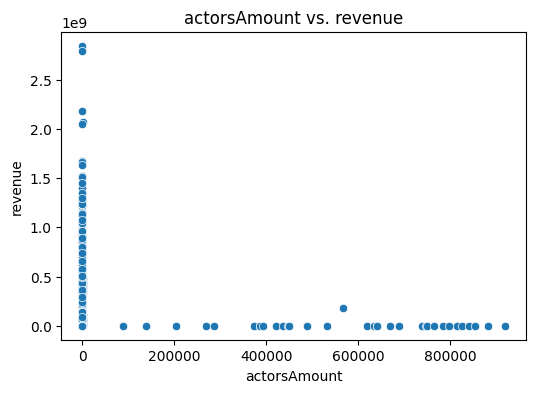

Promedio de actores por año:


releaseYear
1902      11.000000
1920      11.000000
1921      35.000000
1922      20.000000
1925      31.500000
           ...     
2018    3896.748808
2019    2107.874183
2020    2832.315197
2021    3188.525735
2022      12.142857
Name: actorsAmount, Length: 99, dtype: float64

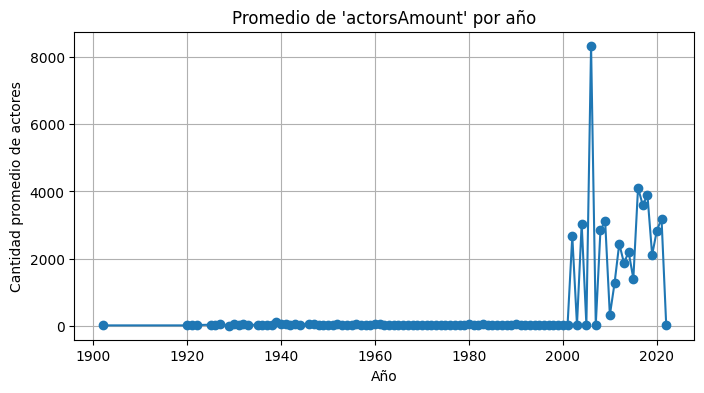

In [43]:
# 1) Correlación entre `actorsAmount` y `revenue`
if "actorsAmount" in df.columns and "revenue" in df.columns:
    corr_act_rev = df["actorsAmount"].corr(df["revenue"])
    print(f"Correlación (actorsAmount vs. revenue): {corr_act_rev:.4f}")
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="actorsAmount", y="revenue")
    plt.title("actorsAmount vs. revenue")
    plt.show()
else:
    print("No se encontraron columnas 'actorsAmount' o 'revenue' en el DataFrame.")

# 2) Evolución de la cantidad de actores con el tiempo
if "actorsAmount" in df.columns and "releaseYear" in df.columns:
    mean_actors_by_year = df.groupby("releaseYear")["actorsAmount"].mean().dropna()
    print("Promedio de actores por año:")
    display(mean_actors_by_year)

    plt.figure(figsize=(8,4))
    mean_actors_by_year.plot(marker='o')
    plt.title("Promedio de 'actorsAmount' por año")
    plt.xlabel("Año")
    plt.ylabel("Cantidad promedio de actores")
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron columnas 'actorsAmount' o 'releaseYear' para analizar la evolución.")

## i) ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos?

Correlaciones entre pct_women, popularity y revenue:


/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/4190805679.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["castMenAmount"].fillna(0, inplace=True)
/var/folders/jq/zj1d7dc15dd57tj80xs_lvxr0000gn/T/ipykernel_63355/4190805679.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

,pct_women,popularity,revenue
pct_women,1.000000,0.005809,-0.063093
popularity,0.005809,1.000000,0.162546
revenue,-0.063093,0.162546,1.000000


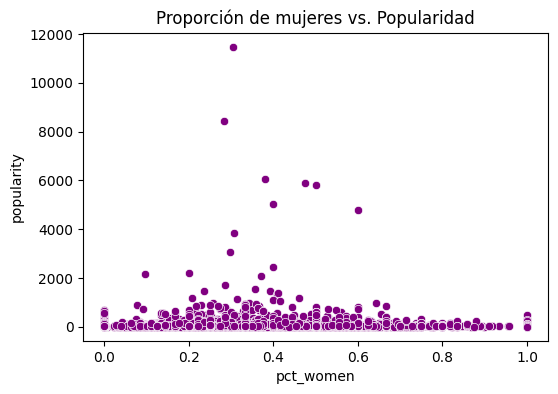

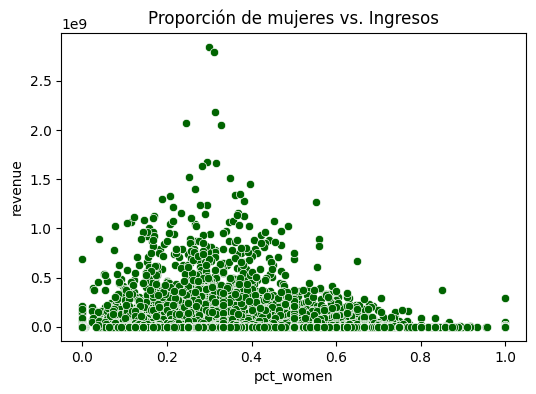

In [45]:
# Verificamos si las columnas necesarias existen
columns_needed = ["castMenAmount", "castWomenAmount", "popularity", "revenue"]
if all(col in df.columns for col in columns_needed):
    
    # 1) Convertir a numérico para evitar errores de tipo
    df["castMenAmount"] = pd.to_numeric(df["castMenAmount"], errors="coerce")
    df["castWomenAmount"] = pd.to_numeric(df["castWomenAmount"], errors="coerce")
    
    # 2) Reemplazar posibles NaN por 0 (opcional, si así lo consideras adecuado)
    df["castMenAmount"].fillna(0, inplace=True)
    df["castWomenAmount"].fillna(0, inplace=True)
    
    # 3) Crear columna con el total del elenco
    df["totalCast"] = df["castMenAmount"] + df["castWomenAmount"]
    
    # 4) Calcular proporciones, evitando división por cero
    df["pct_women"] = np.where(df["totalCast"] > 0,
                               df["castWomenAmount"] / df["totalCast"],
                               0)
    df["pct_men"]   = np.where(df["totalCast"] > 0,
                               df["castMenAmount"]   / df["totalCast"],
                               0)
    
    # 5) Ver correlaciones con 'popularity' y 'revenue'
    corr_matrix = df[["pct_women", "popularity", "revenue"]].corr()
    print("Correlaciones entre pct_women, popularity y revenue:")
    display(corr_matrix)
    
    # 6) Gráfico de dispersión: Proporción de mujeres vs. Popularidad
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="pct_women", y="popularity", color='purple')
    plt.title("Proporción de mujeres vs. Popularidad")
    plt.show()
    
    # 7) Gráfico de dispersión: Proporción de mujeres vs. Ingresos
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="pct_women", y="revenue", color='darkgreen')
    plt.title("Proporción de mujeres vs. Ingresos")
    plt.show()

else:
    print("No se encuentran todas las columnas necesarias (castMenAmount, castWomenAmount, popularity, revenue).")

## j) ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [28]:
# Ordenar por voteAvg (desc) y tomar las primeras 20
df_director = df.sort_values(by="voteAvg", ascending=False).head(20)

# Eliminar nulos en director
df_director = df_director.dropna(subset=["director"])

print("Directores que hicieron las 20 películas mejor calificadas:")
df_director[["director", "title", "voteAvg"]]

Directores que hicieron las 20 películas mejor calificadas:


,director,title,voteAvg
9298,Laurent Bouzereau,Spirit of Vengeance: The Making of 'Ghost Rider',10.0
9733,Christin Baker,Christmas at the Ranch,10.0
9246,Rebecca Sugar,Steven Universe: The Movie: Behind the Curtain,10.0
9990,Miguel Angel Zavala,Los Vengadores Chiflados,10.0
8632,Thomas Coven,Hot Naked Sex & the City,10.0
9347,Kaku Arakawa,How Ponyo was Born ~Hayao Miyazaki's Thought P...,10.0
9084,Víctor Barba|Juan Olivares,Holidays,10.0
6885,Dave Bullock|Troy Adomitis|Victor Cook,The Spectacular Spider-Man Attack of the Lizard,9.6
9368,Won Myeong-jun,Aunt's Temptation 3,9.5
6170,Samuel Leong,Ebola Zombies,9.5


## k) ¿Cómo se correlacionan los presupuestos con los ingresos? 
### ¿Los altos presupuestos significan altos ingresos? (Incluye histogramas y diagrama de dispersión)

Correlación (budget vs. revenue): 0.7575


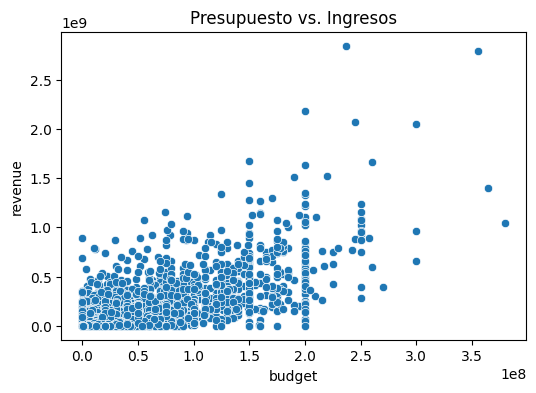

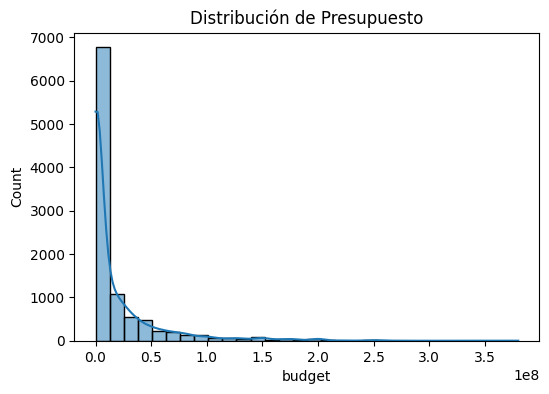

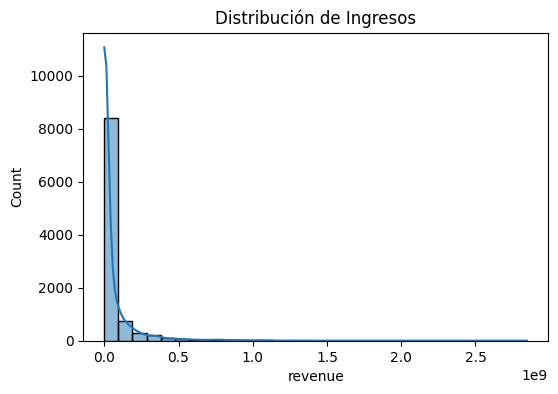

In [46]:
corr_br = df["budget"].corr(df["revenue"])
print(f"Correlación (budget vs. revenue): {corr_br:.4f}")

# Diagrama de dispersión
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="budget", y="revenue")
plt.title("Presupuesto vs. Ingresos")
plt.show()

# Histograma de budget
plt.figure(figsize=(6,4))
sns.histplot(df["budget"], kde=True, bins=30)
plt.title("Distribución de Presupuesto")
plt.show()

# Histograma de revenue
plt.figure(figsize=(6,4))
sns.histplot(df["revenue"], kde=True, bins=30)
plt.title("Distribución de Ingresos")
plt.show()

## l) ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?
### (Incluye gráfica de ingresos por mes)

Ingresos totales por mes de lanzamiento:
releaseMonth
1     2.202045e+10
2     3.029330e+10
3     4.165949e+10
4     3.660657e+10
5     6.131612e+10
6     7.759788e+10
7     6.173530e+10
8     3.284068e+10
9     3.445130e+10
10    4.163847e+10
11    5.769413e+10
12    6.952555e+10
Name: revenue, dtype: float64


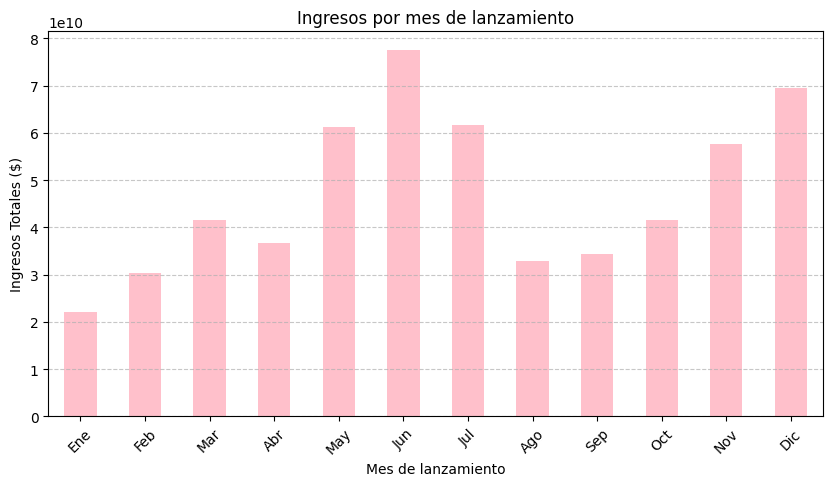

In [32]:
# Asegurar que 'releaseDate' es de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")

# Crear una nueva columna con el mes de lanzamiento
df["releaseMonth"] = df["releaseDate"].dt.month

# Agrupar por mes y sumar los ingresos
mes_revenue = df.groupby("releaseMonth")["revenue"].sum()

# Ordenar los meses correctamente (de enero a diciembre)
mes_revenue = mes_revenue.reindex(range(1, 13), fill_value=0)

print("Ingresos totales por mes de lanzamiento:")
print(mes_revenue)

# Gráfico de barras
plt.figure(figsize=(10, 5))
mes_revenue.plot(kind="bar", color="pink")
plt.xticks(
    ticks=range(12),
    labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
            "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"],
    rotation=45
)
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingresos Totales ($)")
plt.title("Ingresos por mes de lanzamiento")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## m) ¿En qué meses se han visto los lanzamientos con mejores ingresos? 
### ¿Cuántas películas, en promedio, se han lanzado por mes?

In [50]:
# 1) Convierto la fecha y creo releaseMonth
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
df["releaseMonth"] = df["releaseDate"].dt.month

# 2) Asegurar que 'revenue' es numérico
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce").fillna(0)

if "releaseMonth" in df.columns and "revenue" in df.columns:
    # Agrupar por mes y calcular:
    #  - 'mean_revenue': ingreso promedio por mes
    #  - 'movie_count': cuántas películas se lanzaron en ese mes
    grouped_month = df.groupby("releaseMonth").agg({
        "revenue": "mean",   # Promedio de ingresos
        "id": "count"        # Cantidad de películas
    }).rename(columns={"revenue": "mean_revenue", "id": "movie_count"})
    
    # Ordenar del mes 1 (enero) al 12 (diciembre), llenando con 0 donde falten datos
    grouped_month = grouped_month.reindex(range(1, 13), fill_value=0)
    
    # Ordenamos de mayor a menor 'mean_revenue'
    grouped_month_sorted = grouped_month.sort_values(by="mean_revenue", ascending=False)
    
    print("Estadísticas por mes (mean_revenue y movie_count), ordenadas por mayores ingresos:")
    display(grouped_month_sorted)
    
    # Identificar mes con mejores ingresos promedio (puedes tomar del DataFrame original o del ordenado)
    best_month = grouped_month["mean_revenue"].idxmax()
    best_month_value = grouped_month["mean_revenue"].max()
    print(f"\nMes con mejores ingresos promedio: {best_month}, "
          f"con un promedio de ${best_month_value:,.2f}")
    
    # Promedio de películas lanzadas por mes (basado en grouped_month)
    avg_movies = grouped_month["movie_count"].mean()
    print(f"En promedio, se lanzan {avg_movies:.2f} películas por mes.")
    
else:
    print("No se encuentran las columnas 'releaseMonth' y/o 'revenue' en el DataFrame.")

Estadísticas por mes (mean_revenue y movie_count), ordenadas por mayores ingresos:


,mean_revenue,movie_count
releaseMonth,,
6,9.474711e+07,819
5,8.784544e+07,698
7,7.602870e+07,812
12,7.435888e+07,935
11,7.149211e+07,807
4,5.259565e+07,696
3,5.111594e+07,815
2,4.290835e+07,706
10,3.898733e+07,1068



Mes con mejores ingresos promedio: 6, con un promedio de $94,747,108.23
En promedio, se lanzan 833.33 películas por mes.


## n) ¿Cómo se correlacionan las calificaciones (voteAvg) con el éxito comercial (revenue)?

Correlación entre voteAvg y revenue: 0.1413


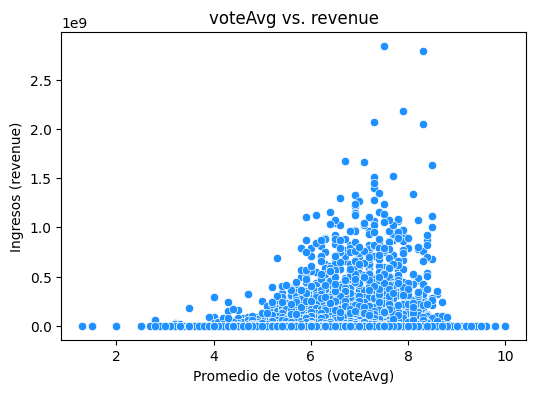

In [51]:
if "voteAvg" in df.columns and "revenue" in df.columns:
    # 1) Cálculo de la correlación
    corr_vavg_rev = df["voteAvg"].corr(df["revenue"])
    print(f"Correlación entre voteAvg y revenue: {corr_vavg_rev:.4f}")
    
    # 2) Gráfico de dispersión
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="voteAvg", y="revenue", color='dodgerblue')
    plt.title("voteAvg vs. revenue")
    plt.xlabel("Promedio de votos (voteAvg)")
    plt.ylabel("Ingresos (revenue)")
    plt.show()
    
else:
    print("No se encuentran las columnas 'voteAvg' y/o 'revenue' en el DataFrame.")

## o) ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

Ingresos promedio según la existencia de videos promocionales (video):


video
False    5.034359e+07
True     5.063094e+05
Name: revenue, dtype: float64

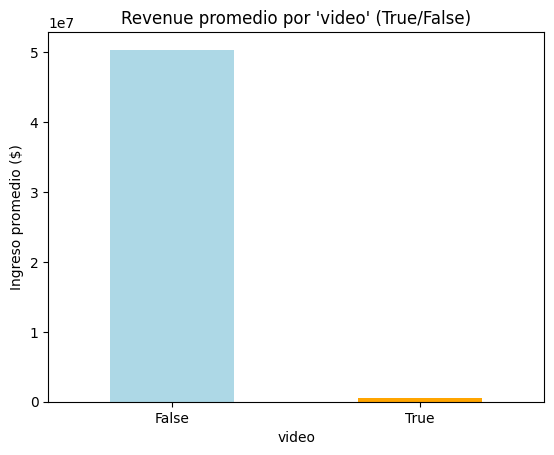


Ingresos promedio según la existencia de página oficial (homePage):


hasHomePage
False    3.261263e+07
True     9.014971e+07
Name: revenue, dtype: float64

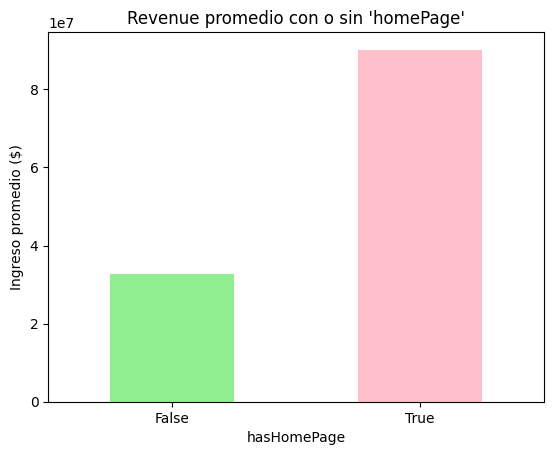

In [52]:
# 1) Comparar películas con 'video' True/False en términos de ingresos
if "video" in df.columns and "revenue" in df.columns:
    video_group = df.groupby("video")["revenue"].mean()
    print("Ingresos promedio según la existencia de videos promocionales (video):")
    display(video_group)
    
    # Opcional: gráficos de barras
    video_group.plot(kind="bar", color=["lightblue", "orange"], rot=0)
    plt.title("Revenue promedio por 'video' (True/False)")
    plt.ylabel("Ingreso promedio ($)")
    plt.show()
else:
    print("No se encuentran las columnas 'video' y/o 'revenue' en el DataFrame para el análisis de marketing.")

# 2) Comparar películas con 'homePage' (página oficial) vs. sin ella
#    Creamos una columna booleana 'hasHomePage'
if "homePage" in df.columns and "revenue" in df.columns:
    df["hasHomePage"] = df["homePage"].notnull()
    homepage_group = df.groupby("hasHomePage")["revenue"].mean()
    
    print("\nIngresos promedio según la existencia de página oficial (homePage):")
    display(homepage_group)
    
    # Opcional: gráfico
    homepage_group.plot(kind="bar", color=["lightgreen", "pink"], rot=0)
    plt.title("Revenue promedio con o sin 'homePage'")
    plt.ylabel("Ingreso promedio ($)")
    plt.show()
else:
    print("No se encuentran las columnas 'homePage' y/o 'revenue' en el DataFrame para el análisis de marketing.")

## p) ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

Correlación (actorsPopularity vs. revenue): -0.0112


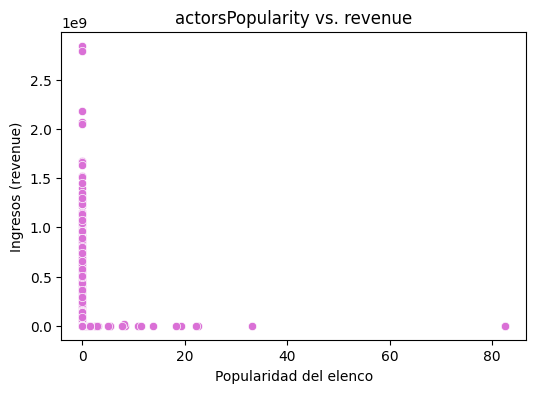

In [53]:
if "actorsPopularity" in df.columns and "revenue" in df.columns:
    # Convertir a numérico por precaución (si la columna no está ya en float)
    df["actorsPopularity"] = pd.to_numeric(df["actorsPopularity"], errors="coerce").fillna(0)
    df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce").fillna(0)
    
    # 1) Calcular la correlación
    corr_pop_rev = df["actorsPopularity"].corr(df["revenue"])
    print(f"Correlación (actorsPopularity vs. revenue): {corr_pop_rev:.4f}")
    
    # 2) Graficar diagrama de dispersión
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="actorsPopularity", y="revenue", color="orchid")
    plt.title("actorsPopularity vs. revenue")
    plt.xlabel("Popularidad del elenco")
    plt.ylabel("Ingresos (revenue)")
    plt.show()

else:
    print("No se encuentran las columnas 'actorsPopularity' y/o 'revenue' en el DataFrame.")